### Clasificacion con "fashion_mnist"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

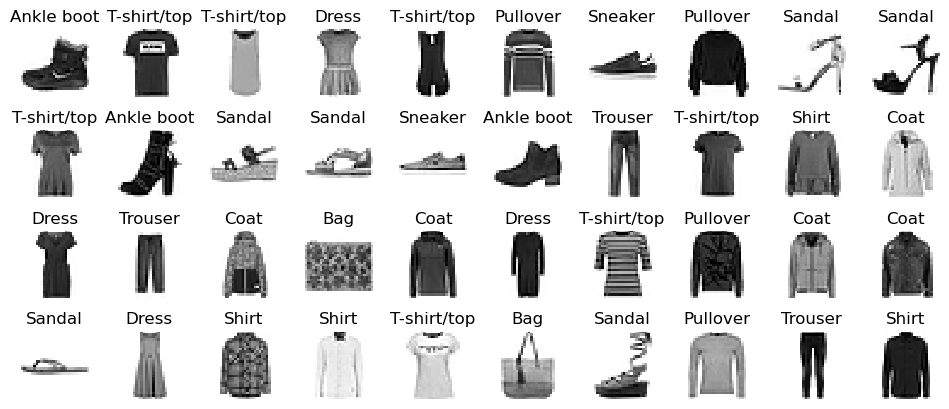

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255 

In [33]:
model =     ()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))#pasa a probabilidad
#Mismas neuronas de salidas que de clases
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [35]:
sgd = SGD(learning_rate=0.005)
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd ,metrics=["accuracy"])

In [36]:
epochs = 1000

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_val,y_valid),callbacks=[early_stopping_cb])

Epoch 1/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6213 - loss: 1.2326 - val_accuracy: 0.8026 - val_loss: 0.5899
Epoch 2/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8035 - loss: 0.5795 - val_accuracy: 0.8308 - val_loss: 0.5015
Epoch 3/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8252 - loss: 0.5079 - val_accuracy: 0.8398 - val_loss: 0.4632
Epoch 4/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8358 - loss: 0.4696 - val_accuracy: 0.8452 - val_loss: 0.4470
Epoch 5/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8433 - loss: 0.4481 - val_accuracy: 0.8532 - val_loss: 0.4251
Epoch 6/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8508 - loss: 0.4285 - val_accuracy: 0.8576 - val_loss: 0.4135
Epoch 7/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8529 - loss: 0.4229 - val_accuracy: 0.8622 - val_loss: 0.3997
Epoch 8/1000
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 -

<Axes: >

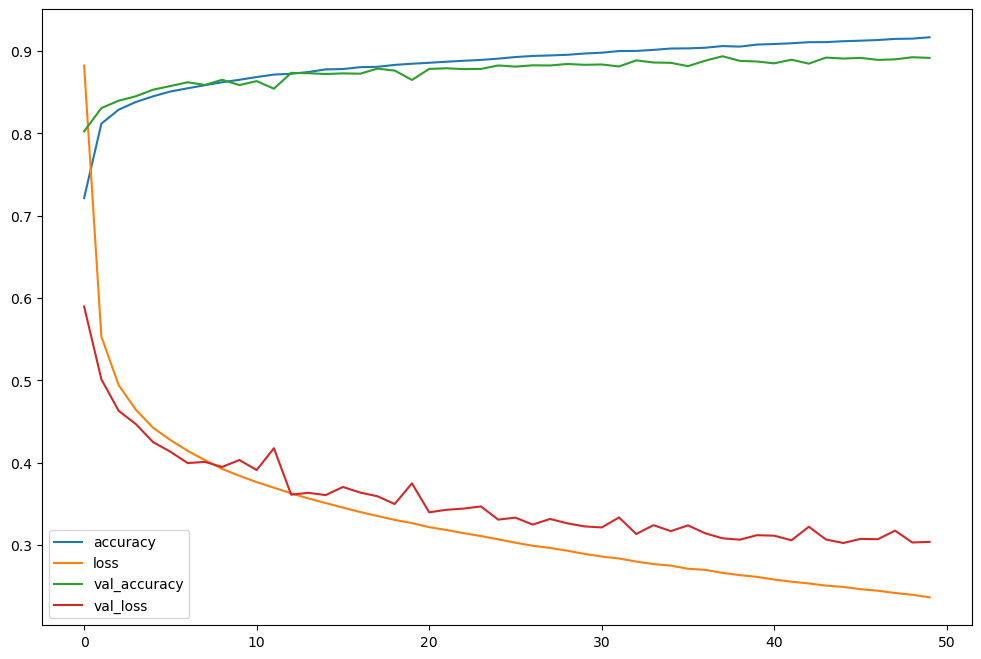

In [37]:
pd.DataFrame(history.history).plot(figsize=(12,8))

In [38]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8812 - loss: 0.3364


[0.33627912402153015, 0.881600022315979]

In [39]:
X_nuevas = X_test[:3]
y_nuevas_pred = model.predict(X_nuevas)
y_nuevas_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
y_pred = np.argmax(y_nuevas_pred,axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)